<a href="https://colab.research.google.com/github/pierrelouisbescond/medium_articles/blob/main/medium_pictures_structural_similarities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### *PEP8 checked*

### Importing librairies

In [ ]:
import os
os.chdir("/content/drive/My Drive/Medium/XAI_Winter/04_classified_arrays/")

import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format


import matplotlib.pyplot as plt

from skimage.metrics import mean_squared_error
from skimage.metrics  import structural_similarity as ssim


### Uploading and shuffing dataset

In [ ]:
data_collect = np.load('data_collect_RGB.npy')

# We shuffle the data to ensure randomness
np.random.shuffle(data_collect)

# We convert the arrays to a (0,1) range
data_collect = data_collect.astype('float32')
data_collect = data_collect / 255

print(data_collect.shape)


(371, 180, 260, 3)


In [ ]:
# This function will help us display batch of pictures
def plot_figures(figures, nrows=1, ncols=1):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind, title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title])
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    fig.set_figheight(5)
    fig.set_figwidth(20)


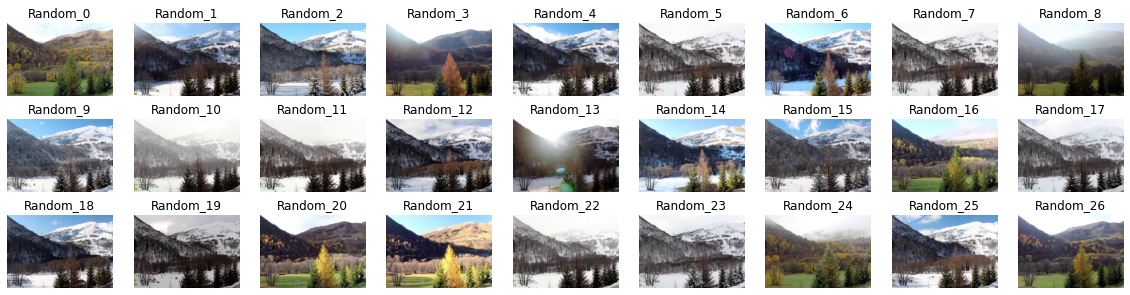

In [ ]:
# We create a dictionnary with 27 random pictures
random_pictures = {}
random_pictures_number = 27

for idx in np.arange(random_pictures_number):
  random_pictures["Random_" + str(idx)] = data_collect[idx]

plot_figures(random_pictures, nrows=3, ncols=9)

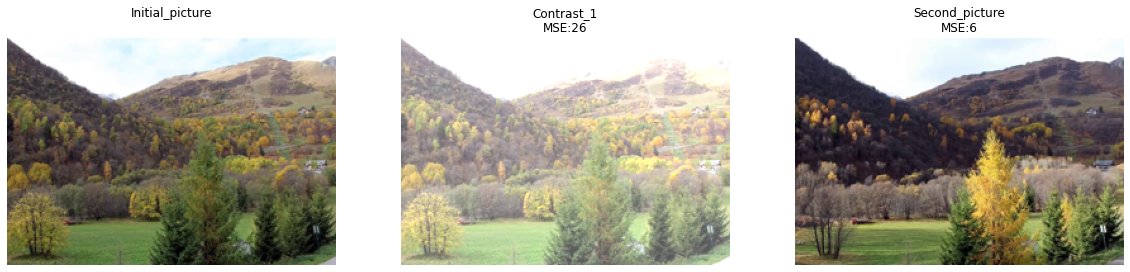

In [ ]:
initial_picture = random_pictures["Random_0"]

# We convert the initial picture into a brigther one (+0.35)
contrast_1 = np.clip(random_pictures["Random_0"] + 0.35, 0, 1)

second_picture = random_pictures["Random_20"]

# Let's start by calculating MSE
mse_initial_contrast = mean_squared_error(initial_picture, contrast_1) * 255
mse_initial_second = mean_squared_error(initial_picture, second_picture) * 255

picture_changes = {"Initial_picture\n": initial_picture,
                  "Contrast_1\nMSE:{:.0f}".format(mse_initial_contrast): contrast_1,
                  "Second_picture\nMSE:{:.0f}".format(mse_initial_second): second_picture
                   }

plot_figures(picture_changes, nrows=1, ncols=3)


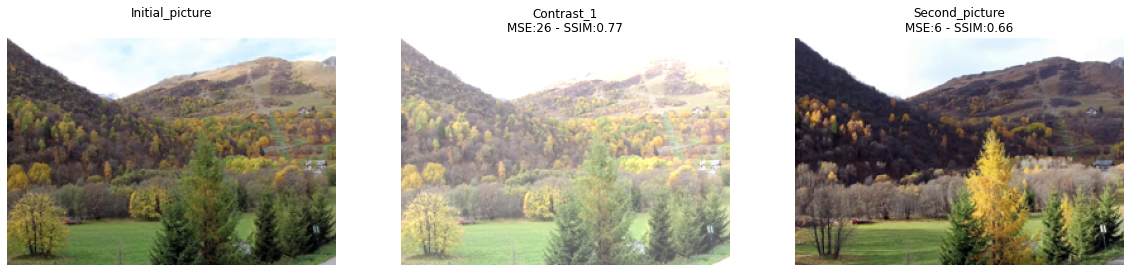

In [ ]:
# We calculate and add SSIM to the pictures displayed
ssim_initial_contrast = ssim(initial_picture, contrast_1, multichannel=True)
ssim_initial_second = ssim(initial_picture, second_picture, multichannel=True)

picture_changes = {"Initial_picture\n": initial_picture,
                  "Contrast_1\nMSE:{0:.0f} - SSIM:{1:.2f}".format(mse_initial_contrast, ssim_initial_contrast): contrast_1,
                  "Second_picture\nMSE:{0:.0f} - SSIM:{1:.2f}".format(mse_initial_second, ssim_initial_second): second_picture
                   }

plot_figures(picture_changes, nrows=1, ncols=3)


In [ ]:
def similarity_matrix_analysis(X_row, X_col):

  # The matrix has 2 first axis: MSE and SSIM
  similarity_matrix = np.zeros((2, len(X_row), len(X_col)))

  for idx_X_col, X_col_picture in enumerate(X_col):

    for idx_X_row, X_row_picture in enumerate(X_row):

      mse_res = mean_squared_error(X_row_picture, X_col_picture)
      ssim_res = ssim(X_row_picture, X_col_picture, multichannel=True)

      similarity_matrix[0, idx_X_row, idx_X_col] = mse_res
      similarity_matrix[1, idx_X_row, idx_X_col] = ssim_res

  return similarity_matrix


In [ ]:
sim_mat_np = similarity_matrix_analysis(data_collect[0:random_pictures_number], data_collect[0:random_pictures_number])

In [ ]:
# Let's display the MSE matrix
mse_mat = pd.DataFrame(sim_mat_np[0])
mse_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.00,0.05,0.06,0.03,0.07,0.07,0.06,0.07,0.04,0.07,0.10,0.09,0.05,0.04,0.07,0.06,0.03,0.06,0.07,0.04,0.02,0.06,0.08,0.06,0.02,0.08,0.01
1,0.05,0.00,0.05,0.05,0.02,0.04,0.03,0.04,0.07,0.04,0.09,0.06,0.02,0.05,0.04,0.03,0.07,0.04,0.02,0.02,0.07,0.09,0.05,0.04,0.05,0.04,0.04
2,0.06,0.05,0.00,0.08,0.04,0.04,0.04,0.04,0.09,0.03,0.08,0.06,0.04,0.08,0.03,0.03,0.05,0.04,0.04,0.05,0.08,0.05,0.06,0.03,0.06,0.03,0.07
3,0.03,0.05,0.08,0.00,0.09,0.08,0.08,0.08,0.03,0.08,0.10,0.09,0.06,0.03,0.09,0.07,0.05,0.07,0.08,0.05,0.04,0.09,0.08,0.07,0.03,0.10,0.01
4,0.07,0.02,0.04,0.09,0.00,0.04,0.03,0.04,0.10,0.02,0.09,0.05,0.02,0.08,0.04,0.02,0.08,0.03,0.02,0.03,0.10,0.09,0.05,0.04,0.07,0.02,0.07
5,0.07,0.04,0.04,0.08,0.04,0.00,0.03,0.00,0.07,0.03,0.03,0.02,0.03,0.06,0.04,0.04,0.07,0.01,0.04,0.03,0.10,0.09,0.01,0.01,0.05,0.03,0.07
6,0.06,0.03,0.04,0.08,0.03,0.03,0.00,0.03,0.08,0.03,0.08,0.05,0.02,0.07,0.02,0.03,0.06,0.04,0.02,0.03,0.09,0.08,0.04,0.03,0.05,0.03,0.06
7,0.07,0.04,0.04,0.08,0.04,0.00,0.03,0.00,0.07,0.03,0.03,0.02,0.03,0.06,0.04,0.04,0.06,0.01,0.04,0.03,0.10,0.09,0.01,0.01,0.05,0.03,0.07
8,0.04,0.07,0.09,0.03,0.10,0.07,0.08,0.07,0.00,0.08,0.06,0.07,0.06,0.04,0.10,0.08,0.04,0.06,0.08,0.06,0.09,0.11,0.06,0.07,0.02,0.09,0.03
9,0.07,0.04,0.03,0.08,0.02,0.03,0.03,0.03,0.08,0.00,0.05,0.04,0.04,0.07,0.04,0.02,0.06,0.03,0.03,0.04,0.10,0.08,0.04,0.03,0.06,0.02,0.07


In [ ]:
# Let's display the SSIM matrix
ssim_mat = pd.DataFrame(sim_mat_np[1])
ssim_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,1.00,0.47,0.41,0.61,0.39,0.41,0.45,0.41,0.56,0.47,0.47,0.40,0.44,0.53,0.47,0.43,0.70,0.39,0.45,0.38,0.66,0.51,0.43,0.38,0.75,0.43,0.72
1,0.47,1.00,0.57,0.56,0.67,0.69,0.68,0.69,0.49,0.56,0.61,0.60,0.79,0.63,0.61,0.56,0.44,0.56,0.83,0.73,0.42,0.39,0.67,0.61,0.50,0.69,0.56
2,0.41,0.57,1.00,0.43,0.52,0.57,0.52,0.57,0.40,0.51,0.49,0.45,0.59,0.47,0.58,0.51,0.42,0.50,0.62,0.49,0.39,0.43,0.52,0.62,0.43,0.55,0.42
3,0.61,0.56,0.43,1.00,0.45,0.43,0.48,0.43,0.73,0.48,0.56,0.49,0.46,0.68,0.47,0.45,0.61,0.45,0.48,0.44,0.60,0.47,0.50,0.42,0.65,0.46,0.79
4,0.39,0.67,0.52,0.45,1.00,0.60,0.62,0.60,0.41,0.66,0.52,0.63,0.64,0.50,0.55,0.59,0.40,0.68,0.69,0.64,0.38,0.37,0.58,0.56,0.46,0.64,0.48
5,0.41,0.69,0.57,0.43,0.60,1.00,0.59,1.00,0.43,0.55,0.71,0.70,0.76,0.53,0.56,0.52,0.40,0.68,0.69,0.74,0.35,0.33,0.84,0.79,0.47,0.68,0.45
6,0.45,0.68,0.52,0.48,0.62,0.59,1.00,0.59,0.41,0.54,0.51,0.55,0.63,0.58,0.76,0.51,0.47,0.53,0.71,0.62,0.45,0.46,0.57,0.56,0.47,0.63,0.51
7,0.41,0.69,0.57,0.43,0.60,1.00,0.59,1.00,0.43,0.55,0.71,0.70,0.76,0.53,0.56,0.52,0.40,0.69,0.69,0.75,0.35,0.33,0.84,0.79,0.47,0.69,0.45
8,0.56,0.49,0.40,0.73,0.41,0.43,0.41,0.43,1.00,0.47,0.64,0.55,0.43,0.64,0.40,0.44,0.61,0.48,0.43,0.47,0.47,0.41,0.53,0.44,0.70,0.42,0.71
9,0.47,0.56,0.51,0.48,0.66,0.55,0.54,0.55,0.47,1.00,0.56,0.57,0.52,0.49,0.52,0.64,0.47,0.63,0.58,0.52,0.41,0.40,0.57,0.55,0.53,0.59,0.51


In [ ]:
idx = 0
pictures_chain = [idx]

for step in range(len(data_collect[0:random_pictures_number])-1):
  
  closest_picture_max = ssim_mat[idx][~ssim_mat.index.isin(pictures_chain)].max()
  idx = ssim_mat.index[ssim_mat.loc[:, idx] == closest_picture_max][0]

  pictures_chain.append(idx)

  print (pictures_chain)


[0, 24]
[0, 24, 26]
[0, 24, 26, 3]
[0, 24, 26, 3, 8]
[0, 24, 26, 3, 8, 13]
[0, 24, 26, 3, 8, 13, 10]
[0, 24, 26, 3, 8, 13, 10, 22]
[0, 24, 26, 3, 8, 13, 10, 22, 5]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18, 1]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18, 1, 25]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18, 1, 25, 4]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18, 1, 25, 4, 9]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18, 1, 25, 4, 9, 15]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18, 1, 25, 4, 9, 15, 2]
[0, 24, 26, 3, 8, 13, 10, 22, 5, 7, 23, 17, 11, 19, 12, 18, 1, 25, 4, 

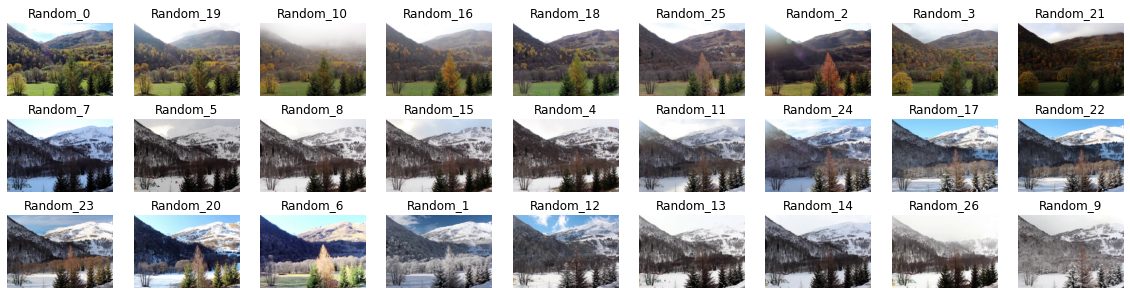

In [ ]:
classified_pictures = {}

for idx in pictures_chain:
  classified_pictures["Random_"+str(idx)] = data_collect[idx]

plot_figures(classified_pictures, nrows=3, ncols=9)
